# Initialisation

In [8]:
#!pip install matplotlib
!pip install scipy

from google.colab import drive
drive.mount('/content/drive/')

#dependencies
import math
import random
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tqdm import tqdm

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
#@markdown #Initialisation of the population
#@markdown N = number of mortals in the simulation

#@markdown ---

N = 16384 #@param {type:"slider", min:16, max:16384, step:16}
I = 8192 #@param {type:"slider", min:16, max:16384, step:16}
#@markdown ---
p = 0.15 #@param {type:"slider", min:0, max:1, step:0.01}
C = 0.1 #@param {type:"slider", min:0, max:1, step:0.01}
#was 0.1
F = 0.4 #@param {type:"slider", min:0, max:1, step:0.01}
#was 0.5
#@markdown ---
A = 0.75 #@param {type:"slider", min:0, max:1, step:0.01}

#mortalBeing class defines parameters that every mortal has. In this case: an isAlive boolean property, a floating-point saturation, and a data array for graphing the saturation over iterations
class mortalBeing:
  def __init__(self, _isAltruistic):
    self.isAlive = True
    self.saturation = 0.5
    self.isAltruistic = _isAltruistic

iterations = [] #iterations array for the x-axis of the graph
mortals = [] #mortals array

isAltruisticData = []
isNonAltruisticData = []

deltaPData = []
hungerToFoodData = []

for n in range(N):
  mortals.append(mortalBeing(n <= (N / 2)))

mortals = np.array(mortals)

# Simulation

In [ ]:
def iterate():
  altruistsAlive = 0
  nonAltruistsAlive = 0
  totalHunger = 0
  for n in range(N):
    if mortals[n].isAlive: 
      mortals[n].saturation = mortals[n].saturation - C
      if mortals[n].isAltruistic == True:
        altruistsAlive += 1
      else:
        nonAltruistsAlive += 1
      totalHunger += 1 - mortals[n].saturation
    if mortals[n].saturation <= 0:
      mortals[n].saturation = 0
      mortals[n].isAlive = False
  isAltruisticData.append(altruistsAlive)
  isNonAltruisticData.append(nonAltruistsAlive)
  if len(iterations) > 1: 
    hungerToFoodData.append(totalHunger / (p*N*F))
    
  runWesselsCode = True
  if runWesselsCode:
    # With lists of custom classes, masks are slightly more difficult to make...
    findAlive = lambda x: x.isAlive
    findOversaturatedAltruists = lambda x: (x.isAltruistic and x.saturation >= A)
    aliveMask = np.array(list(map(findAlive, mortals)))
    oversaturatedAltruistsMask = np.array(list(map(findOversaturatedAltruists, mortals)))
    combinedMask = (aliveMask & ~oversaturatedAltruistsMask) # The '~' flips the mask: True -> False and vice versa
    hungryMortals = mortals[combinedMask]
    hungryMortalsToFeed = np.random.choice(hungryMortals, size=int(N * p), replace=True) # Pick N*p hungry Mortals to feed
    for mortal in hungryMortalsToFeed:
      mortal.saturation = min(mortal.saturation + F, 1)

  else:
    for i in range(int(N * p)):
      index = random.randrange(0, N-1)
      while mortals[index].isAlive == False:
        index = random.randrange(0, N-1)
        while mortals[index].isAltruistic == True and mortals[index].saturation >= A:
          index = random.randrange(0, N-1)
  
      #if mortals[index].isAltruistic == True:
      #  if mortals[index].saturation >= 0.8:
  
      mortals[index].saturation = min(mortals[index].saturation + F, 1)

if len(iterations) > 0:
  rangeMin = iterations[len(iterations)-1] + 1
  rangeMax = iterations[len(iterations)-1] + 1 + I
else:
  rangeMin = 0
  rangeMax = I - 1

for i in tqdm(range(rangeMin, rangeMax)): # tqdm makes a fancy progressbar
  iterations.append(i)
  iterate()

100%|██████████| 8191/8191 [02:39<00:00, 51.46it/s]


# Visualisation

NameError: ignored

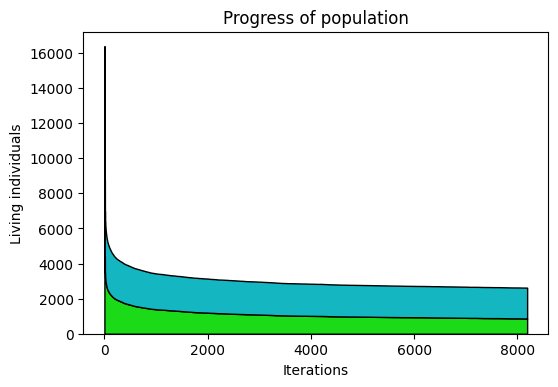

In [ ]:
#@markdown ---
def formatPlot():
  plt.rcParams['figure.dpi'] = 100


palette = ['#1bdb18', '#13b6c1']
props = dict(facecolor='white', alpha=0.5)

def visualiseData():
  formatPlot()
  fig = plt.figure()
  ax = plt.axes()
  plt.title('Progress of population')
  plt.xlabel('Iterations')
  plt.ylabel('Living individuals')
  plt.stackplot(np.array(iterations), [np.array(isAltruisticData), np.array(isNonAltruisticData)], labels=['Altruist', 'Selfish'], alpha=1, colors=palette, edgecolor='#000000')
  plt.legend()
  textstr = textstr = '\n'.join((
    r'$p =%.2f$' % (p, ),
    r'$C =%.2f$' % (C, ),
    r'$F =%.2f$' % (F, )))
  ax.text(0.6, 0.95, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)
  plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot1@{datetime.datetime.now()}.png", dpi=400)
  plt.show()

  formatPlot()
  fig = plt.figure()
  ax = plt.axes()
  plt.title('Population division')
  plt.xlabel('Iterations')
  plt.ylabel('$p_a$')
  plt.axhline(y=0.5, color='black', linestyle='--', linewidth=1, alpha=0.8)
  isAltruisticPercentageData = []
  isNonAltruisticPercentageData = []
  for i in iterations:
    isAltruisticPercentageData.append(isAltruisticData[i] / (isAltruisticData[i] + isNonAltruisticData[i]))
    isNonAltruisticPercentageData.append(isNonAltruisticData[i] / (isAltruisticData[i] + isNonAltruisticData[i]))
  plt.stackplot(np.array(iterations), [np.array(isAltruisticPercentageData), np.array(isNonAltruisticPercentageData)], labels=['Altruist', 'Selfish'], alpha=1, colors=palette, edgecolor='#000000')
  plt.legend();
  textstr = textstr = '\n'.join((
    r'$p =%.2f$' % (p, ),
    r'$C =%.2f$' % (C, ),
    r'$F =%.2f$' % (F, ),
    r'$A =%.2f$' % (A, )))
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)
  plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot2@{datetime.datetime.now()}.png", dpi=400)
  plt.show()

  print("End percentage: ", isAltruisticPercentageData[len(isAltruisticPercentageData) - 1])

  #plt.plot(np.array(iterations), np.array(isNonAltruisticData))

  #data_perc = bank_account_df.divide(bank_account_df.sum(axis=1), axis=0)

  #plt.stackplot(data_perc.index,
  #            [data_perc['basic'], data_perc['saving'],
  #             data_perc['money_mkt'], data_perc['credit']],
  #            labels=['basic', 'saving', 'money_mkt', 'credit'],
  #            alpha=0.8)


  #plt.show()


visualiseData()

In [ ]:
def chancePlot():
  formatPlot()
  fig = plt.figure()
  ax = plt.axes()
  plt.grid()

  plt.title('$p_s$ distribution by saturation')
  plt.xlabel('Saturation')
  plt.ylabel('$p_s$')
  plt.ylim(-0.1, 1.1)

  x = np.linspace(0, 1, 10000)
  n=10 #@param{type:"slider", min:1, max:100, step:1}
  plt.plot(x, 1 - stats.binom.cdf(np.ceil((n*C - x) / F - 1), n, p), color="navy")
  textstr = textstr = '\n'.join((
    r'$n =%i$' % (n, ),
    r'$p =%.2f$' % (p, ),
    r'$C =%.2f$' % (C, ),
    r'$F =%.2f$' % (F, )))
  props = dict(facecolor='white', alpha=0.5)
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)

  plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot3@{datetime.datetime.now()}.png", dpi=400)
  plt.show()


  formatPlot()
  fig = plt.figure()
  ax = plt.axes()
  plt.grid()

  plt.title('$p_s$ distribution by saturation')
  plt.xlabel('Saturation')
  plt.ylabel('$p_s$')

  x = np.linspace(0, 1, 10000)
  plt.plot(x, 1 - stats.binom.cdf(np.ceil((n*C - x) / F - 1), n, p), color="navy")
  textstr = textstr = '\n'.join((
    r'$n =%i$' % (n, ),
    r'$p =%.2f$' % (p, ),
    r'$C =%.2f$' % (C, ),
    r'$F =%.2f$' % (F, )))
  props = dict(facecolor='white', alpha=0.5)
  ax.text(0.05, 0.95, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)
  
  plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot4@{datetime.datetime.now()}.png", dpi=400)
  plt.show()
  
  chanceAtA = 1 - stats.binom.cdf(math.ceil((n*C - A) / F - 1), n, p)
  chanceAlternative = 1 - stats.binom.cdf(math.ceil((n*C - min(A+F, 1)) / F - 1), n, p)
  print("Alt: ", chanceAtA)
  print("Sel: ", chanceAlternative)
  print(((chanceAlternative - chanceAtA) / chanceAlternative)*100, "% disadvantage")
  print((chanceAlternative - chanceAtA) * 100, "%. disadvantage")

chancePlot()

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

deltaPData = []
for i in range(1, iterations[len(iterations) - 1] + 1):
  current = isAltruisticData[i] / (isNonAltruisticData[i] + isAltruisticData[i])
  previous = isAltruisticData[i-1] / (isNonAltruisticData[i-1] + isAltruisticData[i-1])
  deltaP = current - previous
  deltaPData.append(deltaP)

formatPlot()
fig = plt.figure()
ax = plt.axes()
ax.set_axisbelow(True)

plt.title('Influence of food scarcity on $\Delta{p_a}$')
plt.xlabel('$\eta$')
plt.ylabel('$\Delta{p_a}$')

plt.grid()
plt.scatter(hungerToFoodData[int(1/C)+3:len(hungerToFoodData)-1], deltaPData[int(1/C)+4:], s=2, c=range(len(hungerToFoodData)-(int(1/C)+4)))
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Iteration', rotation=270)

rho = np.corrcoef(hungerToFoodData[int(1/C)+2:len(hungerToFoodData)-1], deltaPData[int(1/C)+3:])[0,1]

textstr = textstr = '\n'.join((
  r'$p =%.2f$' % (p, ),
  r'$C =%.2f$' % (C, ),
  r'$F =%.2f$' % (F, ),
  r'$A =%.2f$' % (A, ),
  r'$\rho =%.3f$' % (rho, )))
props = dict(facecolor='white', alpha=0.5)
ax.text(0.05, 0.28, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot5@{datetime.datetime.now()}.png", dpi=400)
plt.show()
print(rho)

formatPlot()
fig = plt.figure()
ax = plt.axes()
ax.set_axisbelow(True)
k = 8 #@param{type:"slider", min:1, max:50, step:1}

plt.title('Influence of food scarcity on $\Delta{p_a}$')
plt.xlabel('$\eta$')
plt.ylabel('$\overline{\Delta{p_a}}$')

plt.grid()
plt.scatter(hungerToFoodData[int(1/C)+k-2:len(hungerToFoodData)-1], moving_average(deltaPData[int(1/C):], k), s=2, c=range(len(hungerToFoodData)-(int(1/C)+k-1)))
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.set_label('Iteration', rotation=270)

rho = np.corrcoef(hungerToFoodData[int(1/C)+k-2:len(hungerToFoodData)-1], moving_average(deltaPData[int(1/C):], k))[0,1]

textstr = textstr = '\n'.join((
  r'$p =%.2f$' % (p, ),
  r'$C =%.2f$' % (C, ),
  r'$F =%.2f$' % (F, ),
  r'$A =%.2f$' % (A, ),
  r'$k =%i$' % (k, ),
  r'$\rho =%.3f$' % (rho, )))
props = dict(facecolor='white', alpha=0.5)
ax.text(0.05, 0.33, textstr, transform=ax.transAxes, verticalalignment='top', bbox=props)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

plt.savefig(f"/content/drive/My Drive/Profielwerkstuk/Output/plot6@{datetime.datetime.now()}.png", dpi=400)
plt.show()
print(rho)